## Loan Prediction Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('LoanData.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
data.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Two types of data present, 
# i) Numerical
# ii) Categorical 

# So needed to replace the values in cateorical data on the basis of mode

In [12]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])


In [13]:
# Replacing the null values in the numerical data with median

In [14]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [15]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Detecting outliers and Handling it

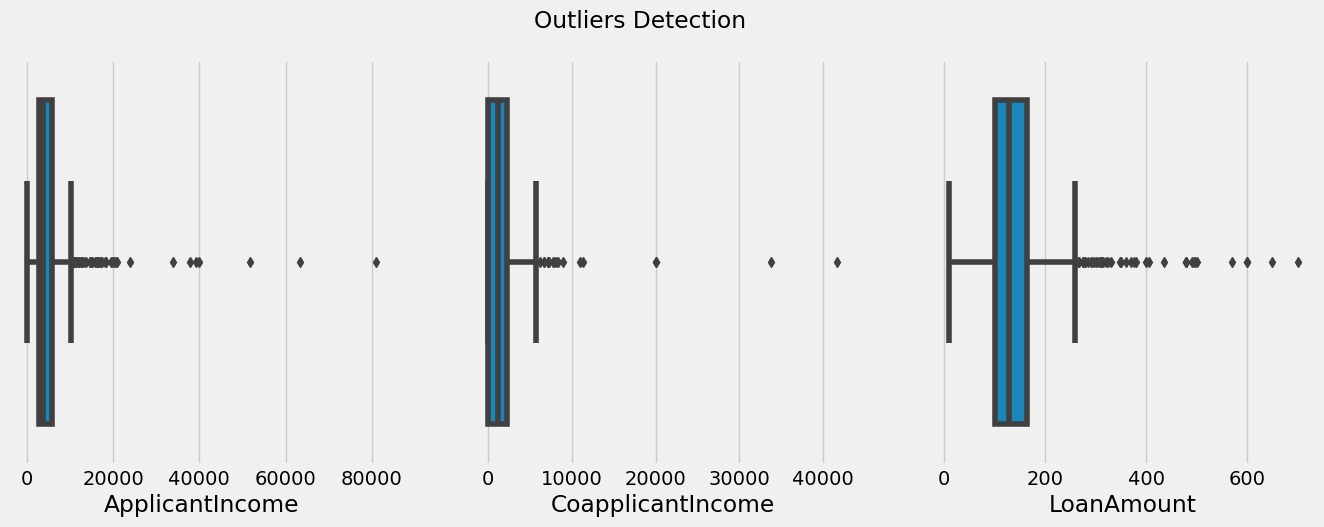

In [16]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers Detection')
plt.show()

In [17]:
print("Before Removing the outliers", data.shape)

data = data[data['ApplicantIncome']<25000]
print("After Removing the outliers", data.shape)

Before Removing the outliers (614, 13)
After Removing the outliers (607, 13)


In [18]:
print("Before Removing the outliers", data.shape)

data = data[data['CoapplicantIncome']<12000]

print("After Removing the outliers", data.shape)

Before Removing the outliers (607, 13)
After Removing the outliers (603, 13)


In [19]:
print("Before Removing the outliers", data.shape)

data = data[data['LoanAmount']<400]

print("After Removing the outliers", data.shape)

Before Removing the outliers (603, 13)
After Removing the outliers (591, 13)


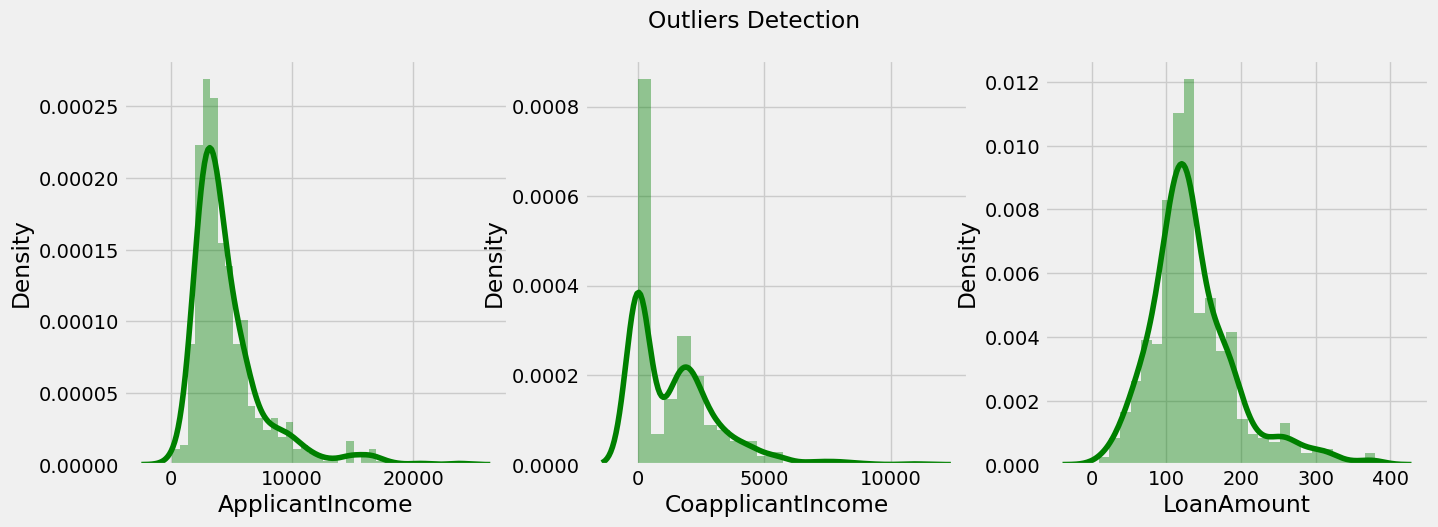

In [20]:
plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'], color='green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'],color ='green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color='green')

plt.suptitle('Outliers Detection')
plt.show()

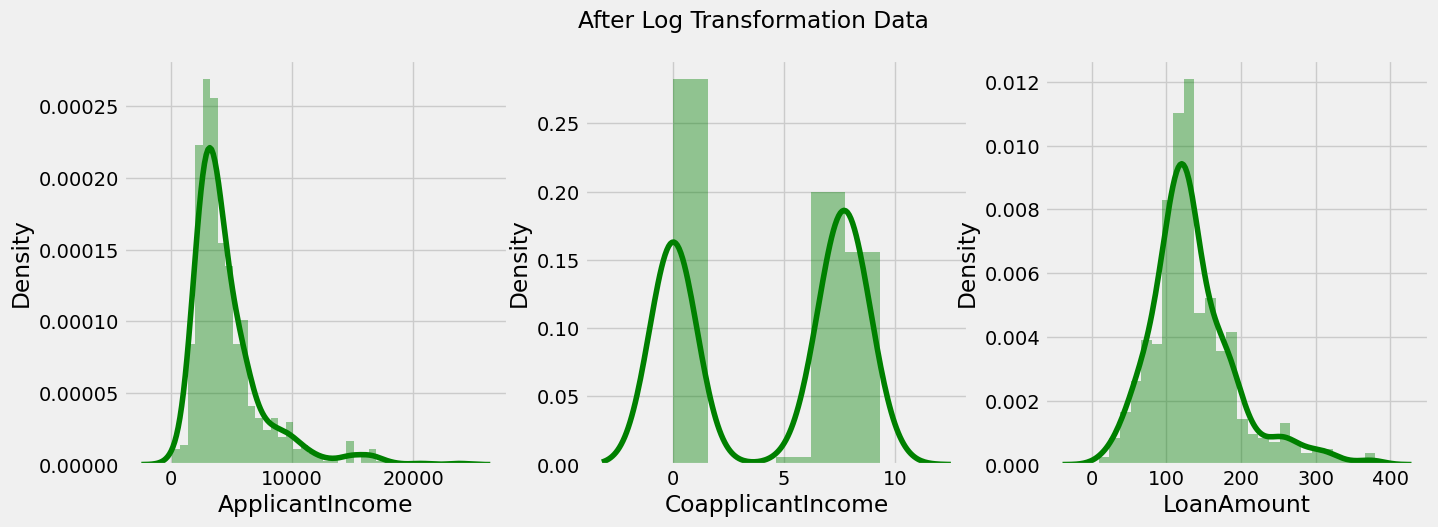

In [21]:
data['applicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'], color ='green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color ='green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color ='green')

plt.suptitle('After Log Transformation Data')
plt.show()

Analysis on categorical with target

In [22]:
categorical_col = data.select_dtypes(include = 'object').columns
cat = categorical_col[1:-1]

In [23]:
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

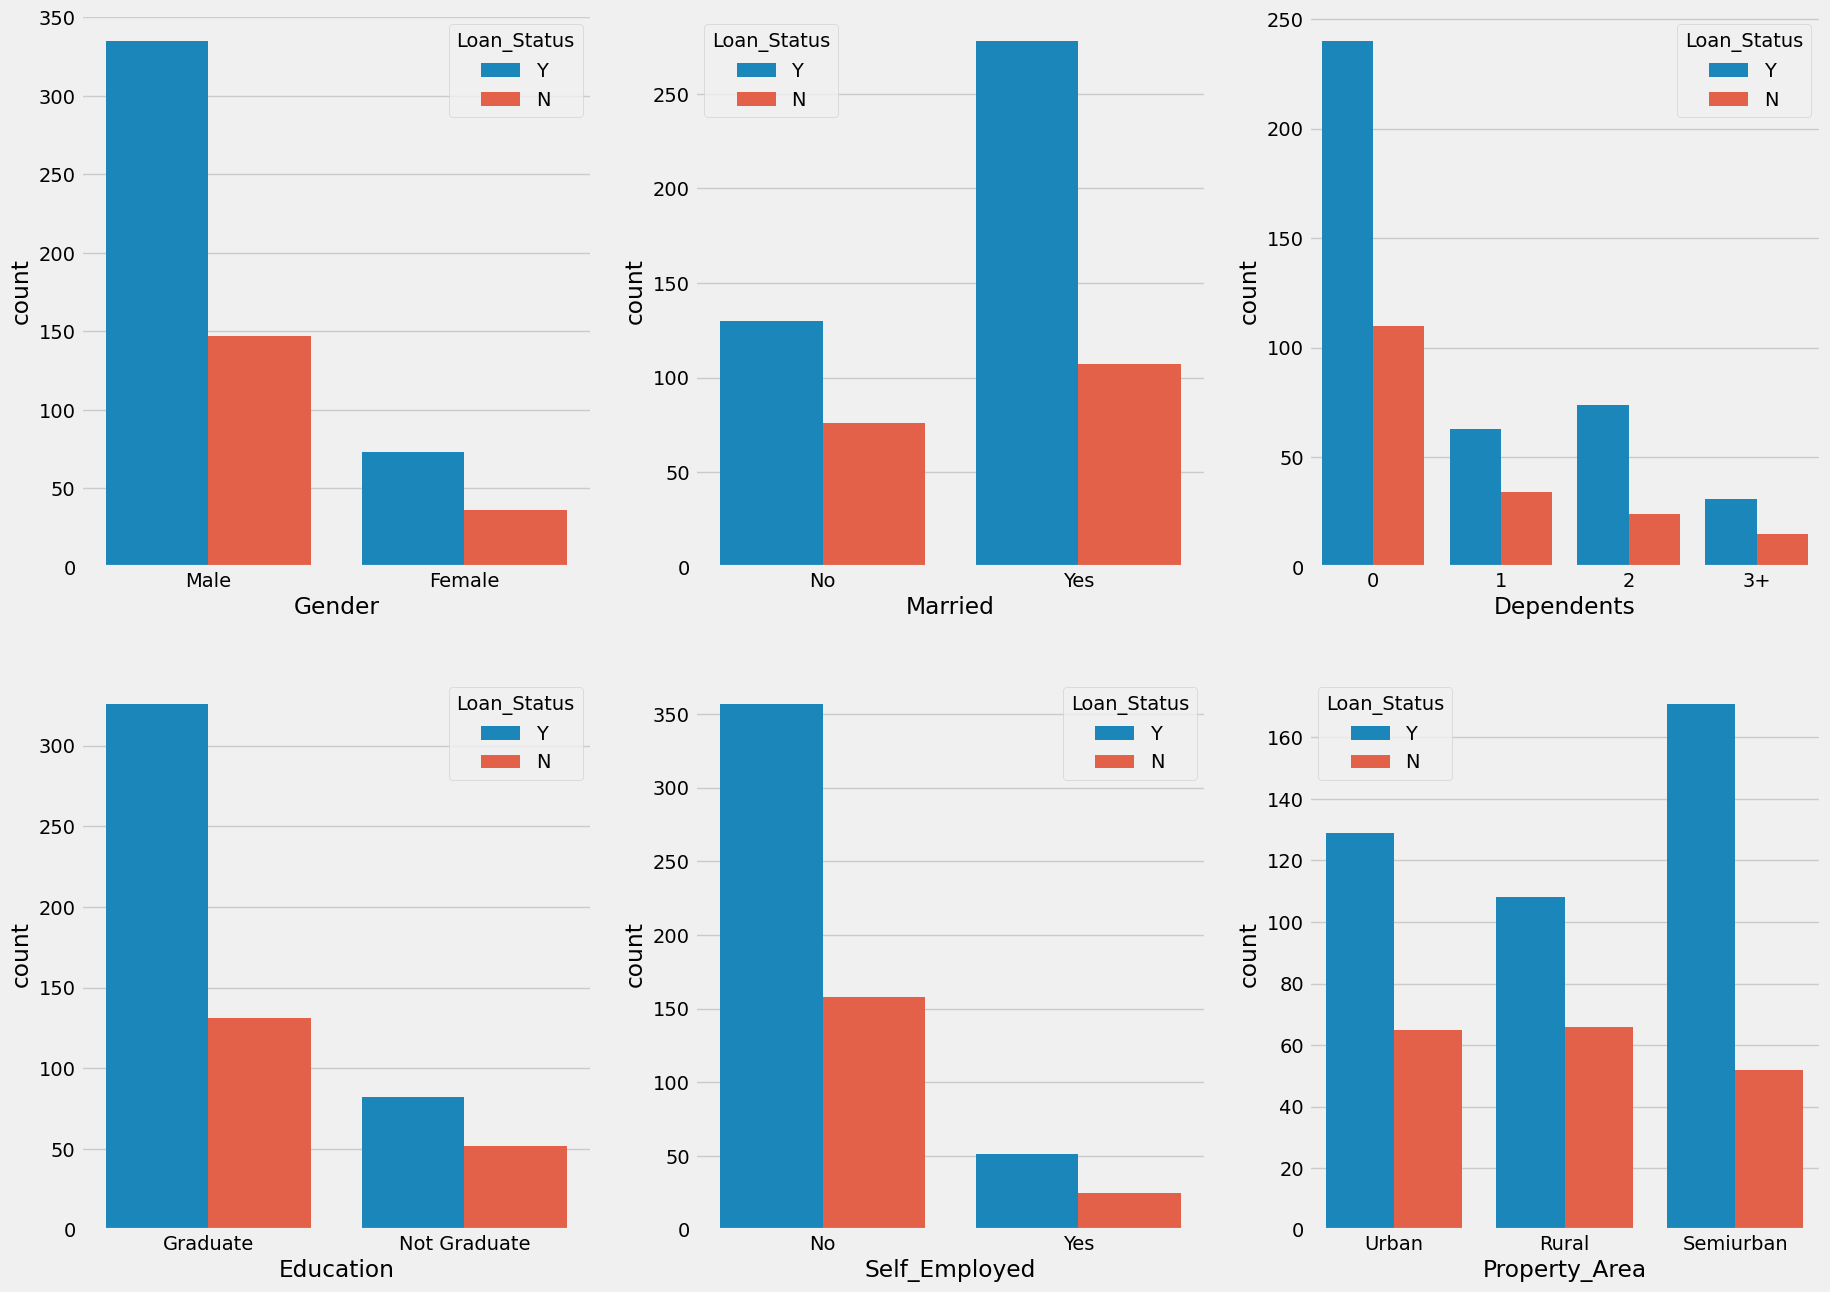

In [24]:
fig , axes = plt.subplots(figsize=(20,15),nrows=2, ncols=3)        # Plot Configuration 

for ax, column in zip(axes.flatten(),cat):                         # Using For loop 
    sns.countplot(data[column],ax=ax, hue=data['Loan_Status'])

Categorical with Target

In [25]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'applicantIncome'],
      dtype='object')

In [26]:
print(pd.crosstab(data['Loan_Status'],data['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [27]:
print(pd.crosstab(data['Loan_Status'],data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [28]:
print(pd.crosstab(data['Loan_Status'],data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [29]:
print(pd.crosstab(data['Loan_Status'],data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


Data Preparation

In [30]:
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


Drop the Loan_id column, doesn't make any impact on the target

In [31]:
data = data.drop(['Loan_ID'], axis = 1)

In [32]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,applicantIncome
0,Male,No,0,Graduate,No,5849,0.000000,128.0,360.0,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,4583,7.319202,128.0,360.0,1.0,Rural,N,8.430109
2,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,2583,7.765993,120.0,360.0,1.0,Urban,Y,7.856707
4,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.000000,71.0,360.0,1.0,Rural,Y,7.972466
610,Male,Yes,3+,Graduate,No,4106,0.000000,40.0,180.0,1.0,Rural,Y,8.320205
611,Male,Yes,1,Graduate,No,8072,5.484797,253.0,360.0,1.0,Urban,Y,8.996157
612,Male,Yes,2,Graduate,No,7583,0.000000,187.0,360.0,1.0,Urban,Y,8.933664


In [33]:
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [34]:
data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes', 'No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'),(1,0))

In [35]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,applicantIncome
0,1,0,0,1,No,5849,0.000000,128.0,360.0,1.0,Urban,Y,8.674026
1,1,1,1,1,No,4583,7.319202,128.0,360.0,1.0,Rural,N,8.430109
2,1,1,0,1,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y,8.006368
3,1,1,0,0,No,2583,7.765993,120.0,360.0,1.0,Urban,Y,7.856707
4,1,0,0,1,No,6000,0.000000,141.0,360.0,1.0,Urban,Y,8.699515


In [36]:
data['Dependents'].value_counts()

0     350
2      98
1      97
3+     46
Name: Dependents, dtype: int64

In [37]:
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'),(1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'),(1,0))

data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban','Rural'),(1,1,0))
data['Dependents'] = data['Dependents'].replace(('0','1','2','3+'),(0,1,1,1))


In [38]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,applicantIncome
0,1,0,0,1,0,5849,0.000000,128.0,360.0,1.0,1,1,8.674026
1,1,1,1,1,0,4583,7.319202,128.0,360.0,1.0,0,0,8.430109
2,1,1,0,1,1,3000,0.000000,66.0,360.0,1.0,1,1,8.006368
3,1,1,0,0,0,2583,7.765993,120.0,360.0,1.0,1,1,7.856707
4,1,0,0,1,0,6000,0.000000,141.0,360.0,1.0,1,1,8.699515


In [39]:
data.info

<bound method DataFrame.info of      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           1          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           1          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantInc

Checking unique values in our dataset for better understanding

In [40]:
data.nunique()

Gender                 2
Married                2
Dependents             2
Education              2
Self_Employed          2
ApplicantIncome      485
CoapplicantIncome    280
LoanAmount           188
Loan_Amount_Term      10
Credit_History         2
Property_Area          2
Loan_Status            2
applicantIncome      485
dtype: int64

Correlation of data

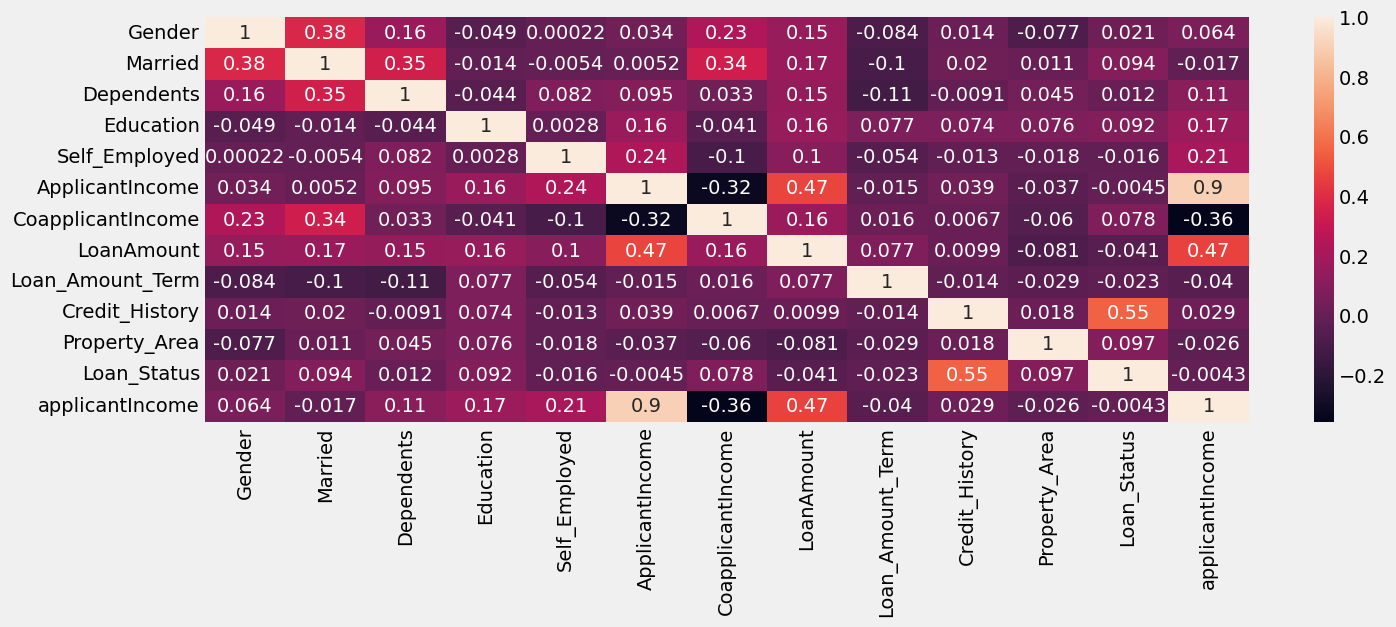

In [41]:
sns.heatmap(data.corr(),annot=True)
plt.show()

Splitting dataset

In [42]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

In [43]:
x.shape

(591, 12)

In [44]:
y.shape

(591,)

Handling Imbalance Data

In [45]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(x, y)

In [46]:
x_resample, y_resample = SMOTE().fit_resample(x, y)

In [47]:
print(x_resample.shape)
print(y_resample.shape)

(816, 12)
(816,)


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.20, random_state = 10)
x_train.shape, x_test.shape

((652, 12), (164, 12))

In [51]:
y_train.shape, y_test.shape

((652,), (164,))

Creating model function to test multiple models and choose the ideal one

In [52]:
def mymodel(model):
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    train_accuracy = model.score(x_train,y_train)
    test_accuracy = model.score(x_test,y_test)
    
    print("Model :-",str(model))
    
    print('\nModel Accuracy: ', accuracy_score(y_test, y_pred))
    print(f'\nTraining Accuracy: {train_accuracy} \nTesting Accuracy :{test_accuracy}')
    print('--------------------------------------')
    print()

    return model

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

knn = mymodel(KNeighborsClassifier())
svc = mymodel(SVC())
dt = mymodel(DecisionTreeClassifier())
lr = mymodel(LogisticRegression())
gnb = mymodel(GaussianNB())
rfc = mymodel(RandomForestClassifier())

Model :- KNeighborsClassifier()

Model Accuracy:  0.6463414634146342

Training Accuracy: 0.7714723926380368 
Testing Accuracy :0.6463414634146342
--------------------------------------

Model :- SVC()

Model Accuracy:  0.43902439024390244

Training Accuracy: 0.5230061349693251 
Testing Accuracy :0.43902439024390244
--------------------------------------

Model :- DecisionTreeClassifier()

Model Accuracy:  0.6951219512195121

Training Accuracy: 1.0 
Testing Accuracy :0.6951219512195121
--------------------------------------

Model :- LogisticRegression()

Model Accuracy:  0.7560975609756098

Training Accuracy: 0.7852760736196319 
Testing Accuracy :0.7560975609756098
--------------------------------------

Model :- GaussianNB()

Model Accuracy:  0.7621951219512195

Training Accuracy: 0.7960122699386503 
Testing Accuracy :0.7621951219512195
--------------------------------------

Model :- RandomForestClassifier()

Model Accuracy:  0.8292682926829268

Training Accuracy: 1.0 
Testing Accura

### Model Building

Logistic regression can be used for our model as its giving effective accuracy.

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
LR = LogisticRegression()

In [56]:
LR.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred = LR.predict(x_test)

In [58]:
print("Training Accuracy",LR.score(x_train,y_train))

Training Accuracy 0.7852760736196319


In [59]:
print("Testing Accuracy",LR.score(x_test,y_test))

Testing Accuracy 0.7560975609756098


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        73
           1       0.81      0.74      0.77        91

    accuracy                           0.76       164
   macro avg       0.76      0.76      0.76       164
weighted avg       0.76      0.76      0.76       164



In [61]:
print(" The Model Accuracy is",accuracy_score(y_pred,y_test))

 The Model Accuracy is 0.7560975609756098
